In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from collections import Counter

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [24]:
df2=df

In [25]:
df.shape

(319795, 18)

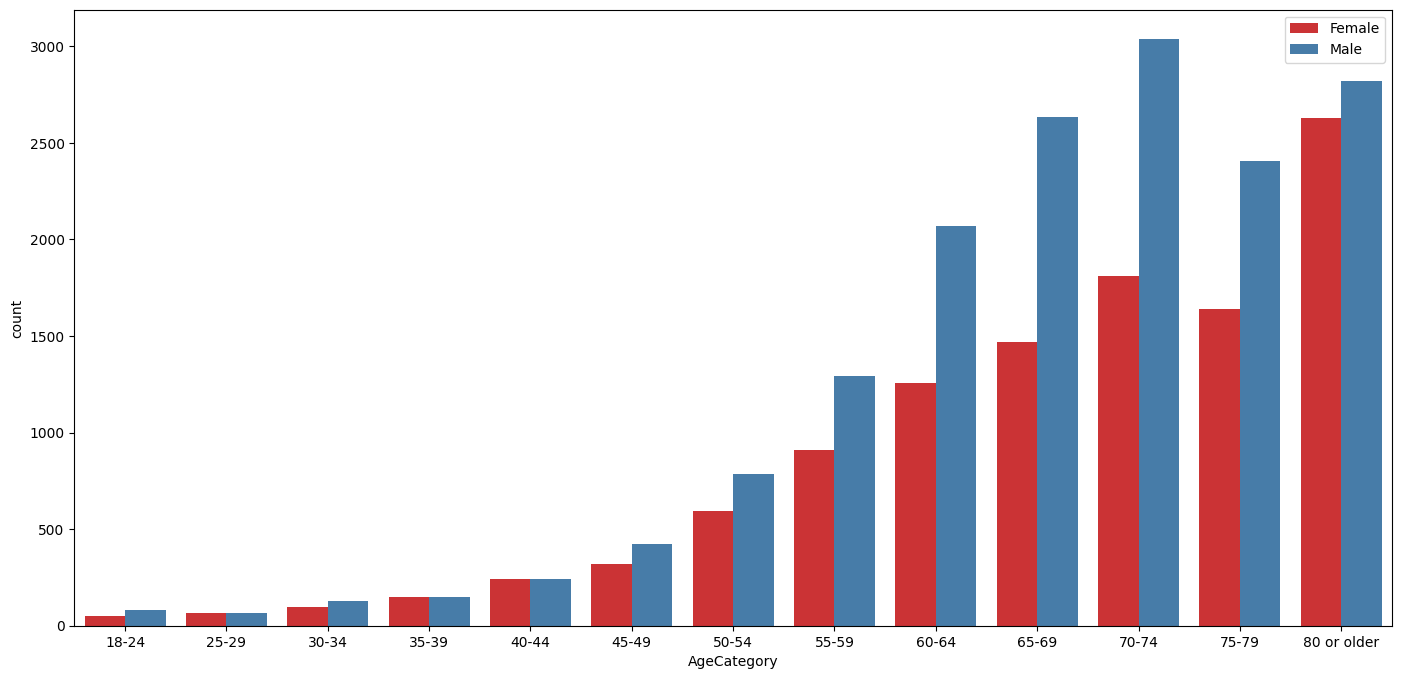

In [5]:
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.legend(['Female','Male'])
plt.show()

In [6]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
cols = ['Smoking','AlcoholDrinking' ,'PhysicalActivity' ]
for i in cols :
    df_yes = df[df[i] == 'Yes']
    df_no = df[df[i] == 'No']
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    
    fig.add_trace(go.Pie(values = df_no.HeartDisease.value_counts().values, labels = [f'No {i}',f'with {i}'],
        marker_colors=irises_colors),row=1,col=1)
    fig.add_trace(go.Pie(values = df_yes.HeartDisease.value_counts().values, labels = [f'No {i}',f'with {i}'],
        marker_colors=irises_colors),row=1,col=2)
    fig.update_layout(legend_title="Labels",
                      annotations=[dict(text=f'No {i}',x=0.15, y=1.10, font_size=30),
                                  dict(text=f'with {i}',x=0.80, y=1.10, font_size=30)],)
    
    fig.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

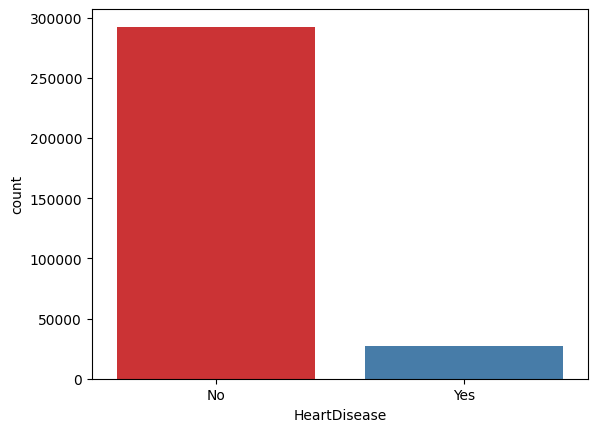

In [7]:
sns.countplot(data=df,x='HeartDisease',palette='Set1')

<Axes: >

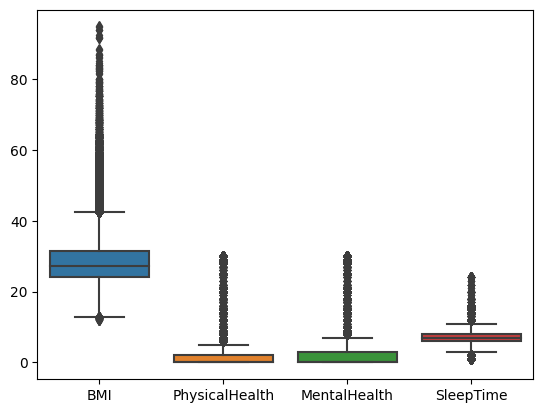

In [3]:
sns.boxplot(data = df)

In [4]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [5]:
outliers_to_drop = detect_outliers(df, 2, ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"])
df.loc[outliers_to_drop]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
90,No,44.29,No,No,No,30.0,10.0,Yes,Female,70-74,White,No,No,Fair,7.0,No,No,Yes
136,No,45.33,No,No,No,15.0,15.0,Yes,Male,50-54,Black,Yes,No,Good,4.0,No,No,No
229,No,49.26,No,No,No,20.0,20.0,Yes,Female,60-64,Black,No,No,Poor,7.0,No,No,No
254,No,53.09,No,No,No,30.0,30.0,Yes,Female,55-59,White,Yes,No,Poor,7.0,No,No,No
504,No,54.87,No,No,No,15.0,15.0,Yes,Female,70-74,White,No,No,Poor,4.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318988,No,26.07,No,No,No,20.0,30.0,Yes,Female,55-59,Hispanic,No,No,Fair,14.0,No,No,No
319163,No,31.17,Yes,No,No,30.0,30.0,Yes,Male,60-64,Hispanic,Yes,No,Poor,12.0,Yes,No,No
319229,No,29.63,Yes,Yes,No,14.0,30.0,No,Female,40-44,Hispanic,No,Yes,Poor,1.0,Yes,Yes,No
319290,No,18.16,No,No,No,30.0,30.0,No,Female,55-59,Hispanic,No,No,Excellent,1.0,No,No,No


In [6]:
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
317370,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
317371,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
317372,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
lb_make = LabelEncoder()
features = ['Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
df[features] = df[features].apply(LabelEncoder().fit_transform)
df['HeartDisease'] = lb_make.fit_transform(df['HeartDisease'])

In [8]:
target = ['HeartDisease']

In [9]:
X = df[features]
y = df[target]
y

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
317369,1
317370,0
317371,0
317372,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

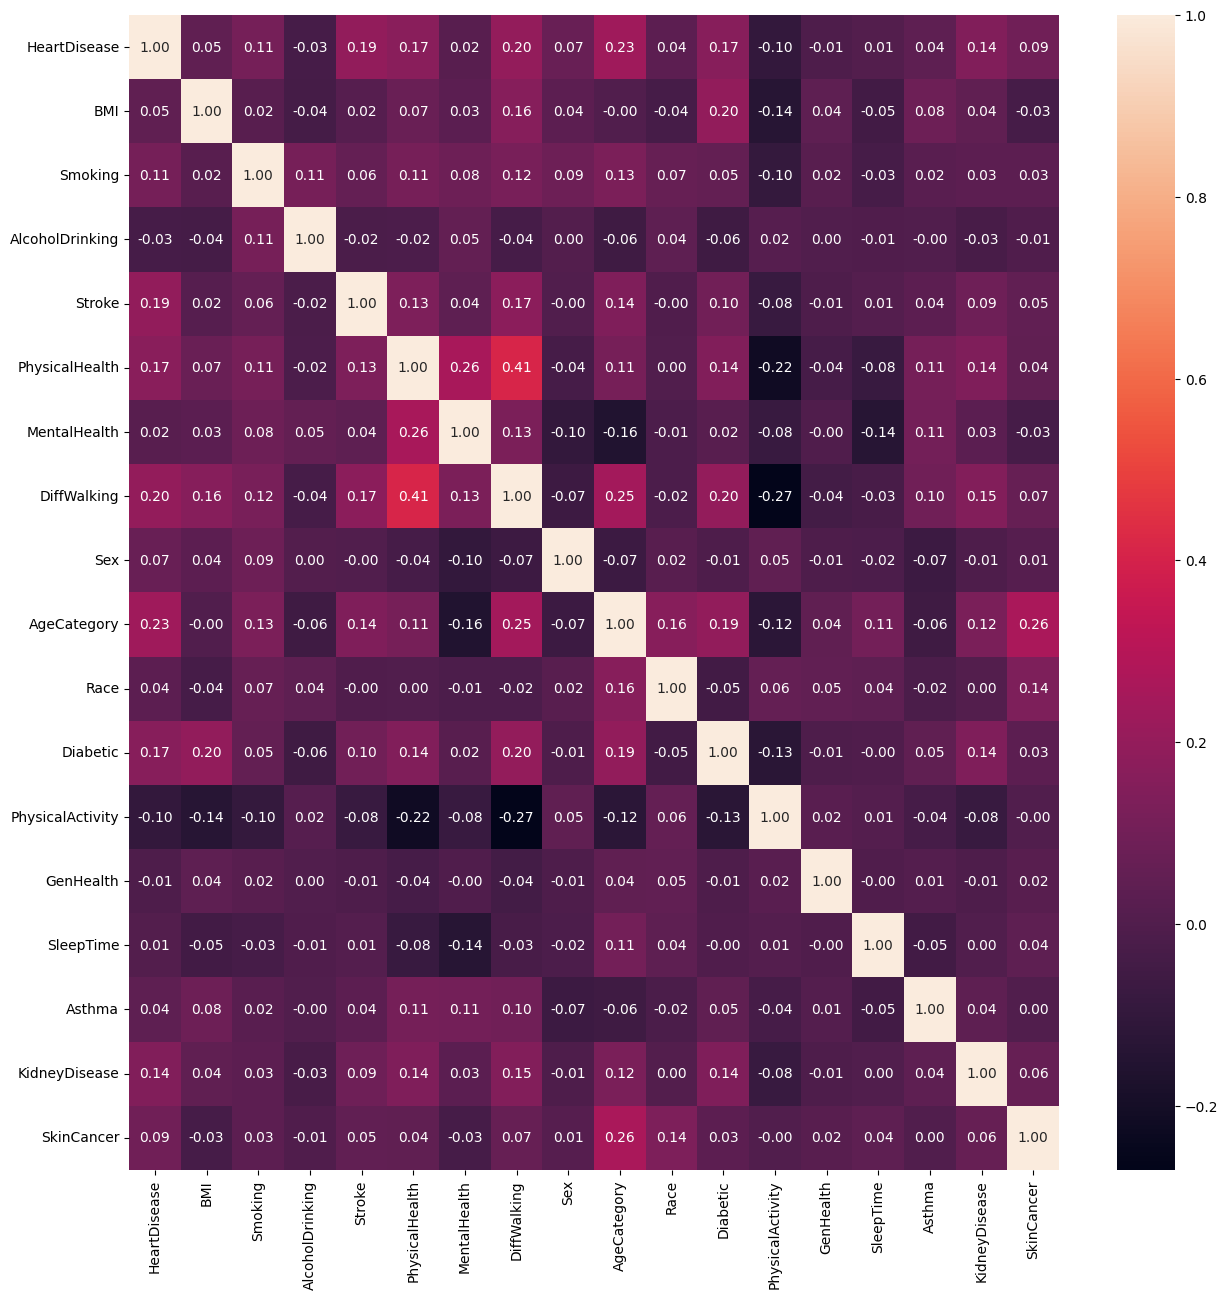

In [41]:
plt.figure(figsize= (15,15))
sns.heatmap(df.corr(), annot = True ,fmt='0.2f')
plt.show()

In [11]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42,max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
y_pred = clf.predict(X_test)

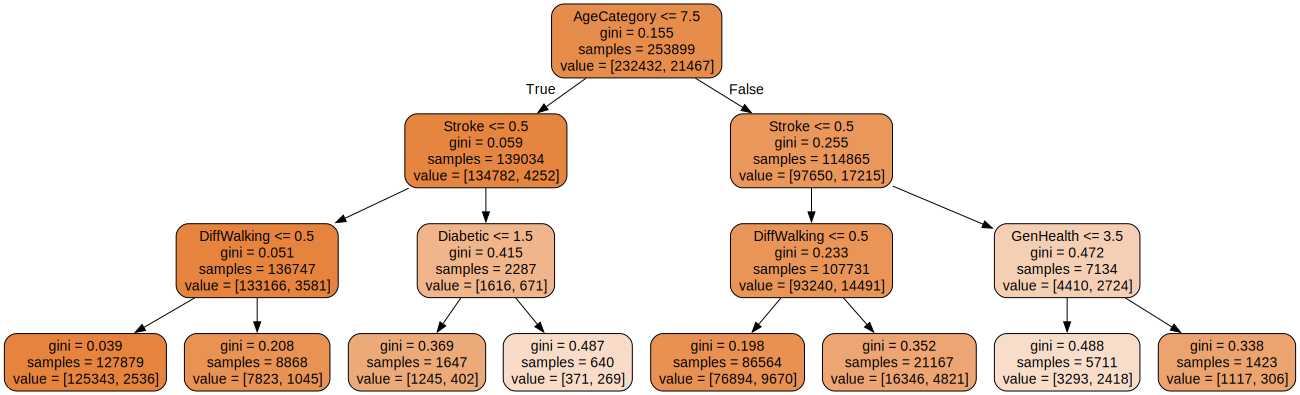

In [13]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
dot_data = tree.export_graphviz(clf,out_file = None,
feature_names=features,
filled =True,
rounded = True )
graph = graphviz.Source(dot_data)
graph

In [14]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[58104     0]
 [ 5371     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58104
           1       0.00      0.00      0.00      5371

    accuracy                           0.92     63475
   macro avg       0.46      0.50      0.48     63475
weighted avg       0.84      0.92      0.87     63475

Accuracy: 0.9153840094525404


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
X

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,0,7,5,2,1,4,1,0,1
1,0,0,1,0,0,12,5,0,1,4,0,0,0
2,1,0,0,0,1,9,5,2,1,1,1,0,0
3,0,0,0,0,0,11,5,0,0,2,0,0,1
4,0,0,0,1,0,4,5,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,1,0,0,1,1,8,3,2,0,1,1,0,0
317370,1,0,0,0,1,3,3,0,1,4,1,0,0
317371,0,0,0,0,0,5,3,0,1,2,0,0,0
317372,0,0,0,0,0,1,3,0,0,2,0,0,0


In [19]:
x = [[1, 0, 0, 0, 1, 12, 3, 2, 0, 0, 1, 1, 1]]
z = clf.predict(x)
print('Du doan mac benh tim ', z)

Du doan mac benh tim  [0]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
